In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline


In [151]:
url="https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv"
dataset=pd.read_csv(url)
dataset

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


### converting the independent categorical variable data into numerical

In [152]:
dataset['rank']=dataset['rank'].replace(['AssocProf'],2)
dataset['rank']=dataset['rank'].replace(['AsstProf'],1)
dataset['rank']=dataset['rank'].replace(['Prof'],0)
dataset['discipline']=dataset['discipline'].replace(['A'],0)
dataset['discipline']=dataset['discipline'].replace(['B'],1)

In [153]:
dataset

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,0,1,19,18,Male,139750
1,0,1,20,16,Male,173200
2,1,1,4,3,Male,79750
3,0,1,45,39,Male,115000
4,0,1,40,41,Male,141500
...,...,...,...,...,...,...
392,0,0,33,30,Male,103106
393,0,0,31,19,Male,150564
394,0,0,42,25,Male,101738
395,0,0,25,15,Male,95329


In [154]:
dataset.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [155]:
dataset.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

### we will get trhe outlier and drop them

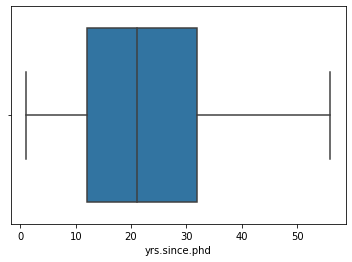

In [156]:
sns.boxplot(dataset['yrs.since.phd'])

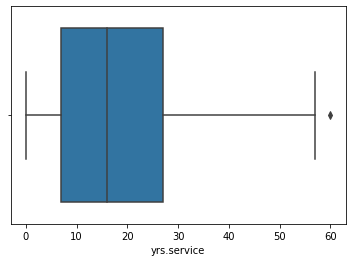

In [129]:
sns.boxplot(dataset['yrs.service'])

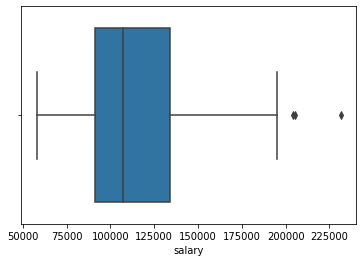

In [130]:
sns.boxplot(dataset['salary'])

### Droping the outlier

In [54]:
dataset.loc[(dataset["salary"]>200000)]

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,0,1,38,38,Male,231545
249,0,0,29,7,Male,204000
364,0,0,43,43,Male,205500


In [131]:
dataset.loc[(dataset["yrs.service"]>58)]

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
330,0,1,49,60,Male,192253


In [135]:
dataset.drop([43,249,364,330],inplace=True)

### using distplot

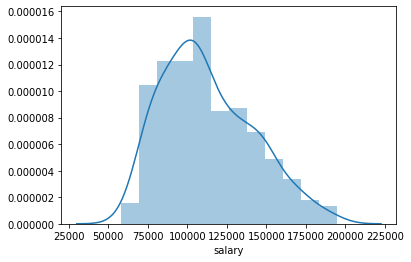

In [140]:
sns.distplot(dataset["salary"])

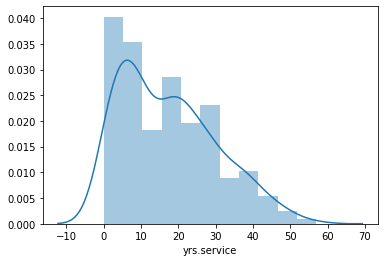

In [141]:
sns.distplot(dataset["yrs.service"])

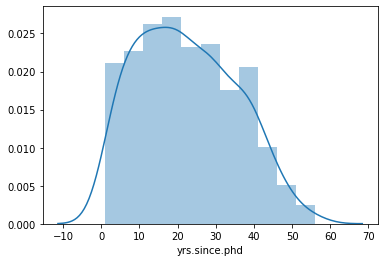

In [157]:
sns.distplot(dataset["yrs.since.phd"])

### using linear regression predixting the salary

In [142]:
import math
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(dataset[['rank','discipline','yrs.since.phd','yrs.service']],dataset.salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
reg.coef_

array([-15866.52413465,  15347.9470541 ,   1151.04407705,   -664.53141682])

In [144]:
reg.intercept_

98351.93795026105

### here we go for the prediction:

In [158]:
#reg.predict([rank,discipline,yrs.since.phd,'yrs.service])
reg.predict([[0,1,22,21]])

array([125067.69494632])